In [1]:
%run utilities.ipynb


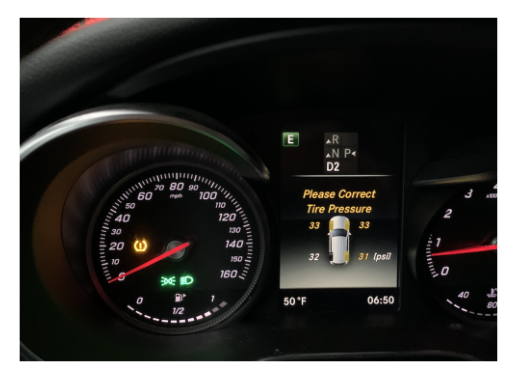

In [2]:
import base64
from PIL import Image
import matplotlib.pyplot as plt
def disp_image(address):
    if address.startswith("http://") or address.startswith("https://"):
        response = requests.get(address)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(address)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')    
      
disp_image("images/tire_pressure.png")      


In [7]:
from langchain_openai import ChatOpenAI
from openai import OpenAI



question = (("What's the problem this is about?"
             " What should be good numbers?"))


base64_image = encode_image("images/tire_pressure.png")
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text":question
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
]


model = ChatOpenAI(model='gpt-4o-2024-08-06',temperature=0)
# message = ... see the above examples ...
response = model.invoke(messages)

In [8]:
print(response.content)

The problem indicated in the image is low tire pressure. The dashboard shows a warning light and a message to correct the tire pressure, with the current pressures being 33, 33, 32, and 31 psi.

For most passenger vehicles, the recommended tire pressure is typically between 30 to 35 psi, but you should check your vehicle's manual or the sticker on the driver's side door jamb for the exact recommended pressure for your specific vehicle. Adjust the tire pressures accordingly to ensure safe and efficient driving.
